### 복습

In [1]:
import cv2
import sys
import numpy as np

#### 마우스 클릭해서 선 그리기

In [10]:
def call_mouse(event, x, y, flags, param):
    global oldx, oldy
    if event == cv2.EVENT_LBUTTONDOWN:
        # print(f'down = x: {x}, y: {y}')
        oldx, oldy = x, y
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags == cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (0,0,255), 5, cv2.LINE_AA)
            cv2.imshow('img', img)
            oldx, oldy = x, y
        # print(f'up = x: {x}, y: {y}')



img = np.ones((600, 800, 3), np.uint8) * 255
cv2.imshow('img', img)
cv2.setMouseCallback('img', call_mouse)

cv2.waitKey()
cv2.destroyAllWindows()

#### 키 입력 후 이미지 변환

In [17]:
src = cv2.imread('./fig/ch2_fig/green.png', cv2.IMREAD_REDUCED_GRAYSCALE_2)
cv2.imshow('img', src)

while True:
    key = cv2.waitKey()

    if key == 27:
        break
    elif key == ord('i'):
        src = ~ src
        cv2.imshow('img', src)
    elif key == ord('e'):
        src = cv2.Canny(src, 50, 150)
        cv2.imshow('img', src)
cv2.destroyAllWindows()

#### 캠 출력 및 저장

In [20]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('Video capture failed')
    sys.exit()

w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS) * 0.7)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')

out = cv2.VideoWriter('video.avi', fourcc, fps, (w, h))


while True:
    ret, frame = cap.read()

    if not ret:
        print('Frame read failed')
        break

    out.write(frame)
    
    cv2.imshow('frame', frame)

    if cv2.waitKey(20) == 27:
        break
cap.release()
out.release()
cv2.destroyAllWindows()

#### 각종 선 및 도형 그리기

In [42]:
img = np.ones((600, 1200, 3), np.uint8) * 255
cv2.line(img, (50, 50), (300,30), (0,0,255), 5, cv2.LINE_AA)
cv2.arrowedLine(img, (300, 30), (200, 300), (0,255,0), cv2.LINE_AA)
cv2.rectangle(img, (100, 400), (300, 500), (255, 0, 0), -1)
cv2.circle(img, (800, 300), 100, (0, 100,100), -1, cv2.LINE_AA)
cv2.putText(img, 'STANLEY + STARBUKCS', (750, 100), cv2.FONT_HERSHEY_COMPLEX, 0.8, (255, 0, 255), 1, cv2.LINE_AA)

cv2.line(img, (400, 30), (400, 300), (0, 0, 255), 10)

cv2.imshow('img', img)

cv2.waitKey()
cv2.destroyAllWindows()

#### 알파 채널

In [43]:
src = cv2.imread('./fig/ch2_fig/imgbin_hat.png', cv2.IMREAD_UNCHANGED)
src = cv2.resize(src, (400, 600), interpolation = cv2.INTER_AREA)

img = src[:, :, :-1]
mask = src[:, :, -1]

cv2.imshow('img', img)
cv2.imshow('mask', mask)

cv2.waitKey()
cv2.destroyAllWindows()

#### 이미지 합치기

In [45]:
src = cv2.imread('./fig/ch2_fig/airplane.bmp')
mask = cv2.imread('./fig/ch2_fig/mask_plane.bmp', 0) # mask 니까 gray로 읽기
dst = cv2.imread('./fig/ch2_fig/field.bmp')

cv2.copyTo(src, mask, dst)

cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

#### mask 없을 시 만드는 방법

In [47]:
src = cv2.imread('./fig/ch2_fig/airplane.bmp')

src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(src_gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

dst = cv2.imread('./fig/ch2_fig/field.bmp')

cv2.copyTo(src, mask, dst)

cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

### 트랙바

In [51]:
def call_trackbar(pos):
    src[:] = (img/255) * pos
    cv2.imshow('src', src)
    # print(f'level = {pos}')


src = cv2.imread('./fig/ch2_fig/puppy.bmp', 0)
img = src.copy()



cv2.imshow('src', src)
cv2.createTrackbar('level', 'src', 0, 255, call_trackbar)

cv2.waitKey()
cv2.destroyAllWindows()

In [60]:
def call_trackbar(pos):
    src[:] = (img/255) * pos
    cv2.imshow('src', src_mask)

src = cv2.imread('./fig/ch2_fig/imgbin_sunglasses_1.png', cv2.IMREAD_UNCHANGED)
src_img = src[:,:,:-1] # 알파채널 빼고 읽기
src_mask = src[:,:,-1] # 알파채널만 읽기

img = src.copy()



cv2.imshow('src', src_mask)
cv2.createTrackbar('level', 'src', 0, 255, call_trackbar)

cv2.waitKey()
cv2.destroyAllWindows()

#### 시간 체크

In [61]:
import time

In [132]:
tm = cv2.TickMeter()
tm.start()

t1 = time.time()

src = cv2.imread('./fig/puppy.bmp')

for _ in range(100):
    img = cv2.GaussianBlur(src, (0,0), 5)

tm.stop()
t2 = time.time()
print(tm.getTimeMilli(), 'ms')
print((t2-t1) * 1000, 'ms')

115.24629999999999 ms
116.0888671875 ms


### 산술연산

In [204]:
src = cv2.imread('./fig/lenna.bmp')

dst = cv2.add(src, 100)
dst = cv2.add(src, (100, 100, 100, 0))

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [143]:
import matplotlib.pyplot as plt

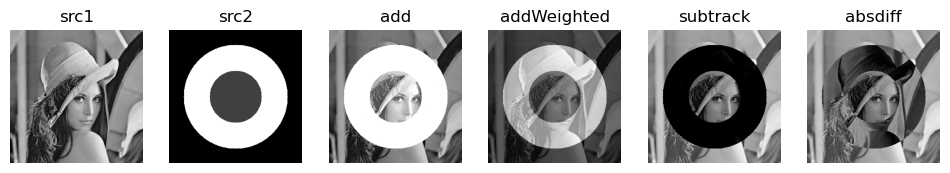

In [166]:
src1 = cv2.imread('./fig/lenna256.bmp', 0)
src2 = np.zeros_like(src1, np.uint8)
cv2.circle(src2, (128, 128), 100, 200, -1)
cv2.circle(src2, (128, 128), 50, 50, -1)

dst1 = cv2.add(src1, src2)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0.0)
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)

# cv2.imshow('src1', src1)
# cv2.imshow('src2', src2)
# cv2.imshow('dst1', dst1)
# cv2.imshow('dst2', dst2)
# cv2.imshow('dst3', dst3)
# cv2.imshow('dst4', dst4)

# cv2.waitKey()
# cv2.destroyAllWindows()

imgs = [src1, src2, dst1, dst2, dst3, dst4]
title = ['src1', 'src2', 'add', 'addWeighted', 'subtrack', 'absdiff']

fig, ax = plt.subplots(1, 6, figsize=(12, 6))

for i in range(6):
    ax[i].imshow(imgs[i], cmap='gray')
    ax[i].set_title(title[i])
    ax[i].axis('off')

### 비트연산

In [177]:
src1 = np.zeros((256, 256), dtype=np.uint8)
cv2.rectangle(src1, (10,10), (127, 248), 255, -1)
src2 = np.zeros((256, 256), dtype=np.uint8)
cv2.circle(src2, (128, 128), 100, 255, -1)

bit_and = cv2.bitwise_and(src1, src2)
bit_or = cv2.bitwise_or(src1, src2)
bit_xor = cv2.bitwise_xor(src1, src2)
bit_not = cv2.bitwise_not(src2)

cv2.imshow('src1', src1)
cv2.imshow('src2', src2)
cv2.imshow('bit_and', bit_and)
cv2.imshow('bit_or', bit_or)
cv2.imshow('bit_xor', bit_xor)
cv2.imshow('bit_not', bit_not)

cv2.waitKey()
cv2.destroyAllWindows()

### 컬러 영상

In [202]:
src = cv2.imread('./fig/flowers.jpg')
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
# print(src.shape)
# print(src.dtype)
b, g, r = cv2.split(src)
h, s, v = cv2.split(src_hsv) # hue 값은 최대값이 179 정도라서 밝게 나올 수가 없음
v_1 = cv2.add(v, -50) # 색상은 보존하면서 밝기만 조절하고 싶을 때

src_merge = cv2.merge((h, s, v_1))
src_merge = cv2.cvtColor(src_merge, cv2.COLOR_HSV2BGR) # BGR로 바꿔줘야 밝기 조절이 가능함
# b = src[:, :, 0]
# g = src[:, :, 1]
# r = src[:, :, 2]


cv2.imshow('src', src)
cv2.imshow('src_merge', src_merge)
# cv2.imshow('b', b)
# cv2.imshow('g', g)
# cv2.imshow('r', r)
# cv2.imshow('h', h)
# cv2.imshow('s', s)
# cv2.imshow('v', v)

cv2.waitKey()
cv2.destroyAllWindows()

(367, 550, 3)
uint8
